1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Read Data

In [2]:
train = pd.read_csv('dataset\\train.csv')
test = pd.read_csv('dataset\\test.csv')

3. Data Analysis

In [3]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
display(train.sample(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


4. Data Visualization

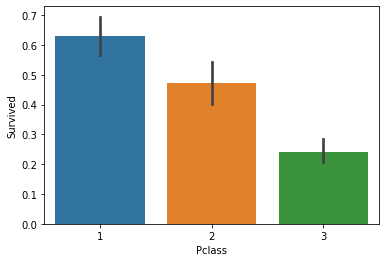

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [7]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()
print(train['Pclass'].value_counts())

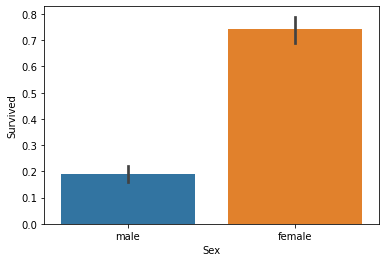

male      577
female    314
Name: Sex, dtype: int64


In [8]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.show()
print(train['Sex'].value_counts())

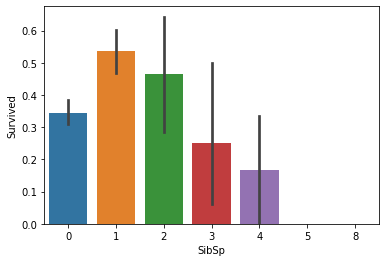

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [9]:
sns.barplot(x='SibSp', y='Survived', data=train)
plt.show()
print(train['SibSp'].value_counts())

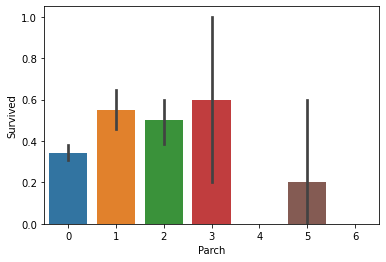

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [10]:
sns.barplot(x='Parch', y='Survived', data=train)
plt.show()
print(train['Parch'].value_counts())

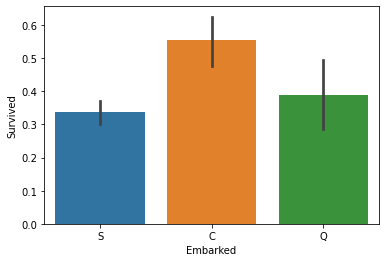

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.show()
print(train['Embarked'].value_counts())

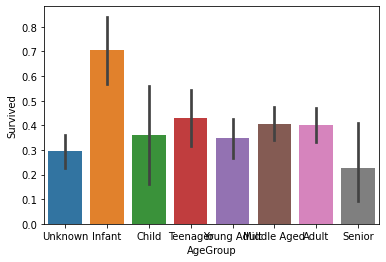

In [12]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Middle Aged', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

5. Data Cleaning

In [13]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,23.941388,0.447368,0.392344,35.627188
std,120.810458,0.841838,17.741080,0.896760,0.981429,55.907576
min,892.000000,1.000000,-0.500000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,9.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
train = train.drop(['Cabin', 'Ticket', 'Name'], axis='columns')
test = test.drop(['Cabin', 'Ticket', 'Name'], axis='columns')

In [15]:
print(pd.isnull(train).sum())
print()
print(pd.isnull(test).sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
AgeGroup       0
dtype: int64

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
AgeGroup       0
dtype: int64


In [16]:
#filling embarked with S as it is most frequent
train = train.fillna({"Embarked": "S"})

In [17]:
#fixing age by random generating age based on train data
from random import choices

age_counts = train['AgeGroup'].value_counts()
age_counts = age_counts.drop(['Unknown'], axis='rows')
prob = age_counts/age_counts.sum()

for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i] == 'Unknown':
        train["AgeGroup"][i] = choices(prob.index.values, prob.values)
    
for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i] == 'Unknown':
        test["AgeGroup"][i] = choices(prob.index.values, prob.values)

In [18]:
train = train.drop(['Age'], axis='columns')
test = test.drop(['Age'], axis='columns')

In [19]:
#Scaler to scale values by their survival probability
import math

def customScale(feature):
    survived = train[feature][train['Survived'] == 1].value_counts().sort_index()
    total = train[feature].value_counts().sort_index()
    
    test_idx = test[feature].value_counts().index
    for x in total.index:
        if x not in survived.index:
            survived[x] = 0
    for x in test_idx:
        if x not in survived.index:
            survived[x] = 0
    prob_mapping = (survived/(total)).to_dict()
    
    for key in prob_mapping:
        if math.isnan(prob_mapping[key]):
            prob_mapping[key] = 0
    
    train[feature] = train[feature].map(prob_mapping)
    test[feature] = test[feature].map(prob_mapping)

In [20]:
display(train)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,male,1,0,7.2500,S,Young Adult
1,2,1,1,female,1,0,71.2833,C,Adult
2,3,1,3,female,0,0,7.9250,S,Middle Aged
3,4,1,1,female,1,0,53.1000,S,Middle Aged
4,5,0,3,male,0,0,8.0500,S,Middle Aged
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,Middle Aged
887,888,1,1,female,0,0,30.0000,S,Young Adult
888,889,0,3,female,1,2,23.4500,S,Teenager
889,890,1,1,male,0,0,30.0000,C,Middle Aged


In [21]:
customScale('Pclass')
customScale('Sex')
customScale('SibSp')
customScale('Parch')
customScale('Embarked')
customScale('AgeGroup')

In [22]:
display(train)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,0.242363,0.188908,0.535885,0.343658,7.2500,0.339009,0.345029
1,2,1,0.629630,0.742038,0.535885,0.343658,71.2833,0.553571,0.388430
2,3,1,0.242363,0.742038,0.345395,0.343658,7.9250,0.339009,0.373665
3,4,1,0.629630,0.742038,0.535885,0.343658,53.1000,0.339009,0.373665
4,5,0,0.242363,0.188908,0.345395,0.343658,8.0500,0.339009,0.373665
...,...,...,...,...,...,...,...,...,...
886,887,0,0.472826,0.188908,0.345395,0.343658,13.0000,0.339009,0.373665
887,888,1,0.629630,0.742038,0.345395,0.343658,30.0000,0.339009,0.345029
888,889,0,0.242363,0.742038,0.535885,0.500000,23.4500,0.339009,0.406593
889,890,1,0.629630,0.188908,0.345395,0.343658,30.0000,0.553571,0.373665


In [23]:
#Replacing single missinf fare with mean
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

#StandardScaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train['Fare'] = sc.fit_transform(train[['Fare']])
test['Fare'] = sc.fit_transform(test[['Fare']])
display(train)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,0.242363,0.188908,0.535885,0.343658,-0.502445,0.339009,0.345029
1,2,1,0.629630,0.742038,0.535885,0.343658,0.786845,0.553571,0.388430
2,3,1,0.242363,0.742038,0.345395,0.343658,-0.488854,0.339009,0.373665
3,4,1,0.629630,0.742038,0.535885,0.343658,0.420730,0.339009,0.373665
4,5,0,0.242363,0.188908,0.345395,0.343658,-0.486337,0.339009,0.373665
...,...,...,...,...,...,...,...,...,...
886,887,0,0.472826,0.188908,0.345395,0.343658,-0.386671,0.339009,0.373665
887,888,1,0.629630,0.742038,0.345395,0.343658,-0.044381,0.339009,0.345029
888,889,0,0.242363,0.742038,0.535885,0.500000,-0.176263,0.339009,0.406593
889,890,1,0.629630,0.188908,0.345395,0.343658,-0.044381,0.553571,0.373665


6. Woring on model

In [24]:
from sklearn.model_selection import train_test_split as tts

X = train.drop(['Survived', 'PassengerId'], axis='columns')
y = train['Survived']

X_train, X_val, y_train, y_val = tts(X, y, test_size=0.2, random_state=0)

In [25]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

83.8


In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.21


In [27]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

78.77


In [28]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.21


c:\users\antik\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [29]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.21


In [30]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

81.01


In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.36


In [32]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.12


In [33]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

82.12


In [34]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.24


In [35]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.36
4,Naive Bayes,83.80
9,Gradient Boosting Classifier,83.24
1,KNN,82.12
8,Stochastic Gradient Descent,82.12
7,Decision Tree,81.01
0,Support Vector Machines,78.77
2,Logistic Regression,78.21
5,Perceptron,78.21
6,Linear SVC,78.21


7. Output File

In [36]:
# Using Gradient Boosting Classifier to generate output file

ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)